<a href="https://colab.research.google.com/github/ameerag2343/AI/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.5, random_state=4)

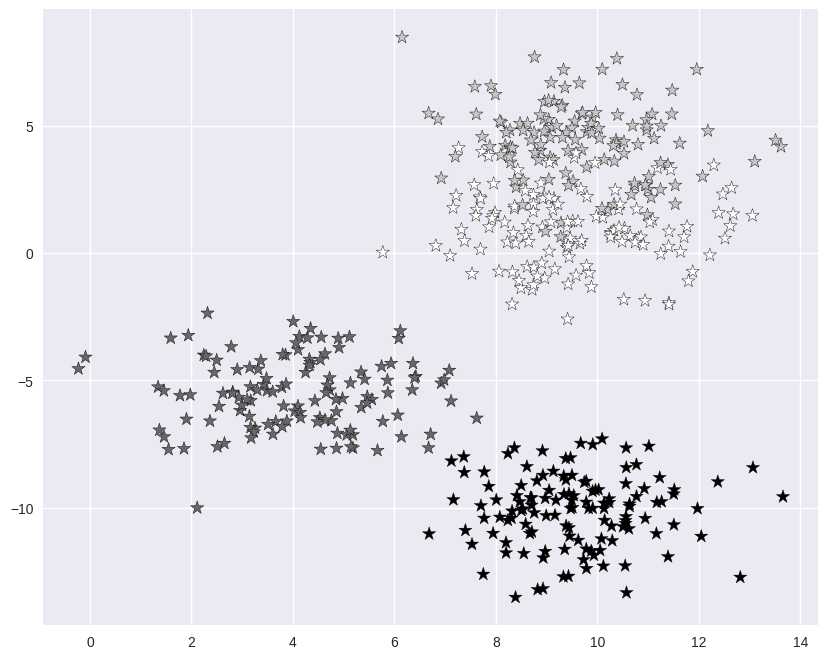

In [5]:
plt.style.use("seaborn-v0_8")
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y,marker='*',s=100,edgecolors='black')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [8]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn1 = KNeighborsClassifier(n_neighbors=1)


In [9]:
knn5.fit  (X_train, y_train)
knn1.fit  (X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5")
print("Accuracy with k=5",accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1")
print("Accuracy with k=1",accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5
Accuracy with k=5 93.60000000000001
Accuracy with k=1
Accuracy with k=1 90.4


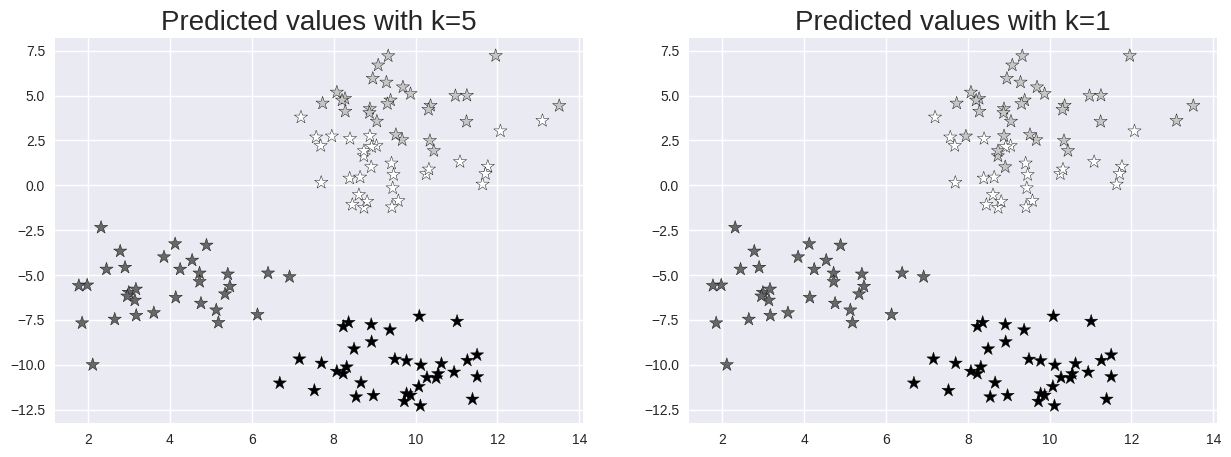

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_5,marker='*',s=100,edgecolors='black')
plt.title("Predicted values with k=5",fontsize=20)
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_1,marker='*',s=100,edgecolors='black')
plt.title("Predicted values with k=1",fontsize=20)
plt.show()


KNN FOR LOOP

In [15]:
df = pd.read_csv("/content/Classified_Data.csv")

In [16]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [18]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [19]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [21]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(n_neighbors=1)

In [22]:
pred = knn.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[131  22]
 [ 11 136]]


In [24]:
error_rate = []

In [25]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

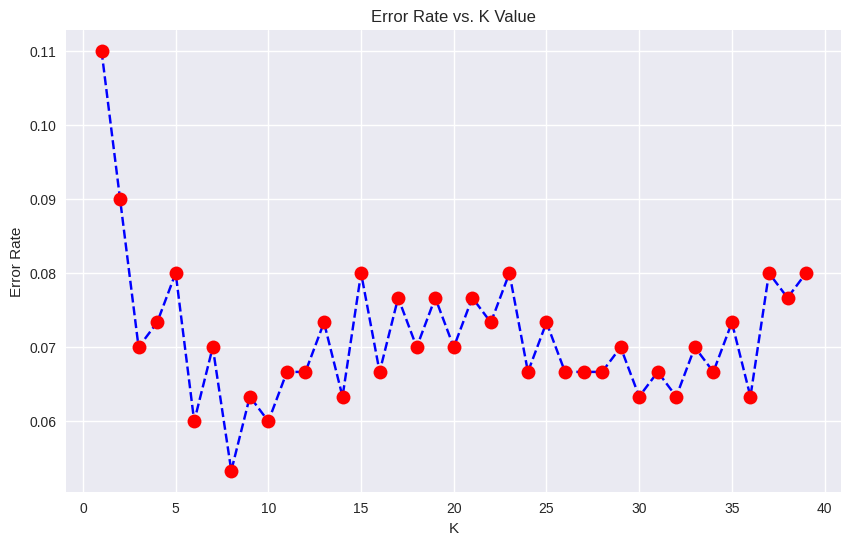

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))


WITH K=1


[[131  22]
 [ 11 136]]
